In [17]:
import keras
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import joblib

In [16]:
!pip install opencv-python

In [2]:
!pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [6]:
!pip install tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached absl-py-0.9.0.tar.gz (104 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached Markdown-3.2.2-py3-none-any.whl (88 kB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for absl-py: filename=absl_py-0.9.0-py3-none-any.whl size=121935 sha256=ce0cc6abce4417d9518a56

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\rimsh\\anaconda3\\Lib\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\include\\grpcpp\\impl\\codegen\\intercepted_channel.h'
Consider using the `--user` option or check the permissions.



In [2]:
!pip install sklearn

In [18]:
label_encoder = joblib.load("label_encoders/label_encoder_42_classes.save")

C:\Users\rimsh\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [19]:
# image folder
folder_path = '../Project_4/10_test'
# path to model
model_path = '../Project_4/optimized_model.h5'
# dimensions of images
img_width, img_height = 320, 240

# load the trained model
model = keras.models.load_model('optimized_model.h5')


# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    resized_array = cv2.resize(array,(320,240),interpolation=cv2.INTER_AREA)
    resized_array_rgb = cv2.cvtColor(resized_array,cv2.COLOR_GRAY2RGB)
    image_array = np.array(resized_array_rgb).reshape(-1, 240, 320, 3)
    images.append(image_array)

# stack up images list to pass for prediction
images = np.vstack(images)
#classes = model.predict_classes(images)
classes = np.argmax(model.predict(images), axis=-1)
print(classes)


[ 8  8 10  4  4 25 21 32 34 38]


In [61]:
encoded =[]
for x in classes:
    encoded.append(label_encoder.inverse_transform([x]))
    print(encoded)

[array(['Chevrolet'], dtype='<U13')]
[array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'], dtype='<U13')]
[array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'], dtype='<U13'), array(['Dodge'], dtype='<U13')]
[array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'], dtype='<U13'), array(['Dodge'], dtype='<U13'), array(['BMW'], dtype='<U13')]
[array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'], dtype='<U13'), array(['Dodge'], dtype='<U13'), array(['BMW'], dtype='<U13'), array(['BMW'], dtype='<U13')]
[array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'], dtype='<U13'), array(['Dodge'], dtype='<U13'), array(['BMW'], dtype='<U13'), array(['BMW'], dtype='<U13'), array(['Lincoln'], dtype='<U13')]
[array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'], dtype='<U13'), array(['Dodge'], dtype='<U13'), array(['BMW'], dtype='<U13'), array(['BMW'], dtype='<U13'), array(['Lincoln'], dtype='<U13'), array(['Kia'], dtype='<U13')]
[array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'],

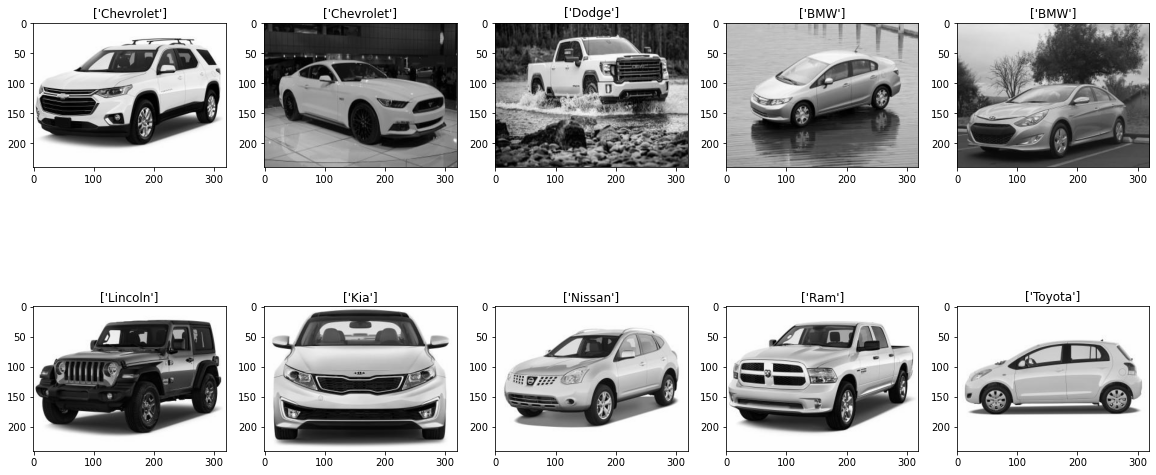

In [62]:
fig = plt.figure(figsize=(20, 20))
for i,img in enumerate(images):
    fig.add_subplot(4,5, i+1)
    plt.title(encoded[i])
    plt.imshow(img/256.)
plt.show()

In [65]:
predictions = model.predict(images)
probability = np.amax(predictions)
print(f'Car Model: {encoded} , Prediction: {predictions}, Probability: {probability}')

Car Model: [array(['Chevrolet'], dtype='<U13'), array(['Chevrolet'], dtype='<U13'), array(['Dodge'], dtype='<U13'), array(['BMW'], dtype='<U13'), array(['BMW'], dtype='<U13'), array(['Lincoln'], dtype='<U13'), array(['Kia'], dtype='<U13'), array(['Nissan'], dtype='<U13'), array(['Ram'], dtype='<U13'), array(['Toyota'], dtype='<U13')] , Prediction: [[2.28459243e-08 4.87630249e-12 7.00310120e-05 2.09318399e-02
  2.20840884e-04 7.20520310e-10 4.05098399e-04 1.81705374e-02
  8.38978112e-01 8.65290133e-08 8.01753330e-09 8.14924533e-07
  1.05926009e-18 1.43804459e-03 7.52056167e-02 1.30376006e-14
  2.80378922e-03 1.30817003e-03 1.08630854e-06 2.20635940e-07
  7.78260073e-05 1.77952519e-03 2.99881431e-09 1.13035739e-07
  6.52933568e-06 2.05732317e-06 6.80791773e-03 6.34903425e-13
  4.30937653e-04 4.48153559e-09 3.07324299e-05 1.93759229e-06
  1.39887501e-02 5.99277299e-03 3.36532437e-08 7.43283202e-13
  1.45310230e-04 4.38351947e-07 9.96620953e-03 4.32572706e-04
  8.02200462e-04 1.98846885e-1

In [22]:
predictions[0]

array([2.2845924e-08, 4.8763025e-12, 7.0031012e-05, 2.0931840e-02,
       2.2084088e-04, 7.2052031e-10, 4.0509840e-04, 1.8170537e-02,
       8.3897811e-01, 8.6529013e-08, 8.0175333e-09, 8.1492453e-07,
       1.0592601e-18, 1.4380446e-03, 7.5205617e-02, 1.3037601e-14,
       2.8037892e-03, 1.3081700e-03, 1.0863085e-06, 2.2063594e-07,
       7.7826007e-05, 1.7795252e-03, 2.9988143e-09, 1.1303574e-07,
       6.5293357e-06, 2.0573232e-06, 6.8079177e-03, 6.3490343e-13,
       4.3093765e-04, 4.4815356e-09, 3.0732430e-05, 1.9375923e-06,
       1.3988750e-02, 5.9927730e-03, 3.3653244e-08, 7.4328320e-13,
       1.4531023e-04, 4.3835195e-07, 9.9662095e-03, 4.3257271e-04,
       8.0220046e-04, 1.9884689e-12], dtype=float32)

In [75]:
#Sort the predictions from least to greatest
#highest probability is at index=9 and the lowest probability is at index = 0.
for prediction in predictions:
    for i,img in enumerate(images):
        list_index = [0,1,2,3,4,5,6,7,8,9]
        x = predictions
        for i in range(10):
            for j in range(10):
                if x[0][list_index[i]] > x[0][list_index[j]]:
                    temp = list_index[i]
                    list_index[i] = list_index[j]
                    list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[8, 3, 7, 6, 4, 2, 9, 0, 5, 1]


In [76]:
#Print the first 5 most likely classes and the corresponding probability.
for i in range(5):
    print(encoded[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

['Ram'] : 83.9 %
['BMW'] : 2.09 %
['Nissan'] : 1.82 %
['Kia'] : 0.04 %
['BMW'] : 0.02 %
